# Classification Modeling: KNeighborsClassifier
### Author: Ehsan Gharib-Nezhad


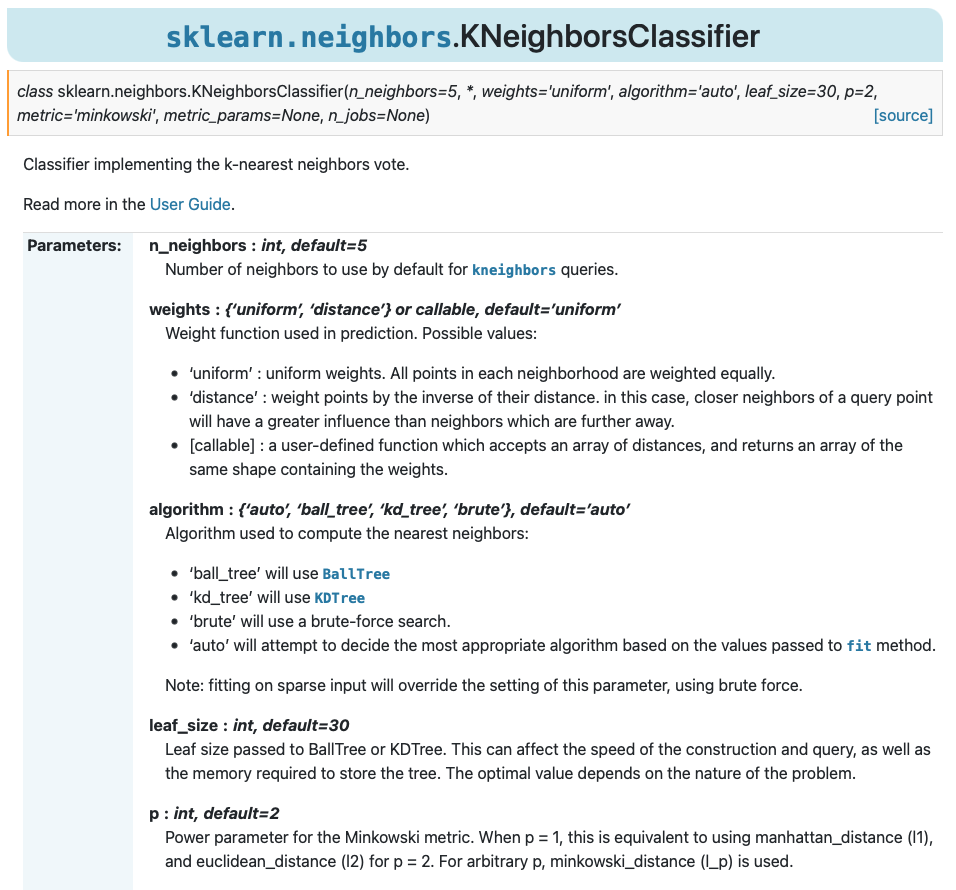

Link: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [4]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

import random

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# Dataset 1: Human dataset
# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [5]:
# Load datasets
human = pd.read_csv('../datasets/human_kmer_dataset.csv')

In [6]:
human.head()

sequence  class  sequence_length  \
0  ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4              207   
1  ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4              681   
2  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3             1686   
3  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3             1206   
4  ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3             1437   

   A_count  T_count  G_count  C_count  \
0       80       45       13       69   
1      206      174       71      230   
2      476      483      393      334   
3      339      363      294      210   
4      417      406      326      288   

                                                2mer  \
0  ['at', 'tg', 'gc', 'cc', 'cc', 'cc', 'ca', 'aa...   
1  ['at', 'tg', 'ga', 'aa', 'ac', 'cg', 'ga', 'aa...   
2  ['at', 'tg', 'gt', 'tg', 'gt', 'tg', 'gg', 'gc...   
3  ['at', 'tg', 'gt', 'tg', 'gt', 'tg', 'gg', 'gc...   
4  ['at', 'tg', 'gc', 'ca', 'aa', 'ac', 'ca', 'ag...   

                                                3mer  \
0  ['atg', 'tgc', 'gcc', 'ccc', 'ccc', 'cca', 'ca...   
1  ['atg', 'tga', 'gaa', 'aac', 'acg', 'cga', 'ga...   
2  ['atg', 'tgt', 'gtg', 'tgt', 'gtg', 'tgg', 'gg...   
3  ['atg', 'tgt', 'gtg', 'tgt', 'gtg', 'tgg', 'gg...   
4  ['atg', 'tgc', 'gca', 'caa', 'aac', 'aca', 'ca...   

                                                4mer  \
0  ['atgc', 'tgcc', 'gccc', 'cccc', 'ccca', 'ccaa...   
1  ['atga', 'tgaa', 'gaac', 'aacg', 'acga', 'cgaa...   
2  ['atgt', 'tgtg', 'gtgt', 'tgtg', 'gtgg', 'tggc...   
3  ['atgt', 'tgtg', 'gtgt', 'tgtg', 'gtgg', 'tggc...   
4  ['atgc', 'tgca', 'gcaa', 'caac', 'aaca', 'acag...   

                                                5mer  \
0  ['atgcc', 'tgccc', 'gcccc', 'cccca', 'cccaa', ...   
1  ['atgaa', 'tgaac', 'gaacg', 'aacga', 'acgaa', ...   
2  ['atgtg', 'tgtgt', 'gtgtg', 'tgtgg', 'gtggc', ...   
3  ['atgtg', 'tgtgt', 'gtgtg', 'tgtgg', 'gtggc', ...   
4  ['atgca', 'tgcaa', 'gcaac', 'caaca', 'aacag', ...   

                                                6mer  \
0  ['atgccc', 'tgcccc', 'gcccca', 'ccccaa', 'ccca...   
1  ['atgaac', 'tgaacg', 'gaacga', 'aacgaa', 'acga...   
2  ['atgtgt', 'tgtgtg', 'gtgtgg', 'tgtggc', 'gtgg...   
3  ['atgtgt', 'tgtgtg', 'gtgtgg', 'tgtggc', 'gtgg...   
4  ['atgcaa', 'tgcaac', 'gcaaca', 'caacag', 'aaca...   

                                                7mer  \
0  ['atgcccc', 'tgcccca', 'gccccaa', 'ccccaac', '...   
1  ['atgaacg', 'tgaacga', 'gaacgaa', 'aacgaaa', '...   
2  ['atgtgtg', 'tgtgtgg', 'gtgtggc', 'tgtggca', '...   
3  ['atgtgtg', 'tgtgtgg', 'gtgtggc', 'tgtggca', '...   
4  ['atgcaac', 'tgcaaca', 'gcaacag', 'caacagc', '...   

                                                8mer  \
0  ['atgcccca', 'tgccccaa', 'gccccaac', 'ccccaact...   
1  ['atgaacga', 'tgaacgaa', 'gaacgaaa', 'aacgaaaa...   
2  ['atgtgtgg', 'tgtgtggc', 'gtgtggca', 'tgtggcat...   
3  ['atgtgtgg', 'tgtgtggc', 'gtgtggca', 'tgtggcat...   
4  ['atgcaaca', 'tgcaacag', 'gcaacagc', 'caacagca...   

                                                9mer  \
0  ['atgccccaa', 'tgccccaac', 'gccccaact', 'cccca...   
1  ['atgaacgaa', 'tgaacgaaa', 'gaacgaaaa', 'aacga...   
2  ['atgtgtggc', 'tgtgtggca', 'gtgtggcat', 'tgtgg...   
3  ['atgtgtggc', 'tgtgtggca', 'gtgtggcat', 'tgtgg...   
4  ['atgcaacag', 'tgcaacagc', 'gcaacagca', 'caaca...   

                                               10mer  
0  ['atgccccaac', 'tgccccaact', 'gccccaacta', 'cc...  
1  ['atgaacgaaa', 'tgaacgaaaa', 'gaacgaaaat', 'aa...  
2  ['atgtgtggca', 'tgtgtggcat', 'gtgtggcatt', 'tg...  
3  ['atgtgtggca', 'tgtgtggcat', 'gtgtggcatt', 'tg...  
4  ['atgcaacagc', 'tgcaacagca', 'gcaacagcat', 'ca...

# Modeling

---

We may want to test lots of different values of hyperparameters in our CountVectorizer.

<details><summary>Why do we need a pipeline to GridSearch over our CountVectorizer hyperparameters?</summary>
    
- The CountVectorizer is a transformer.
- Transformers have .fit() and .transform() methods, but cannot do .predict().
- In order to GridSearch over hyperparameters, we need some way to score our model performance.
- A pipeline stacks together one or more transformers with an estimator at the end. The estimator allows us to .predict() and get a score!
</details>

In [7]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split( [' '.join(x.replace(" ", "")[1:-1].split(',')) 
                                                      for x in human['10mer']] , # for converting the SINGLE string to an array of strings
                                                    human['class'],
                                                    test_size=0.25,
                                                    stratify=human['class'],
                                                    random_state=42)

## Baseline accuracy

We need to calculate baseline accuracy in order to tell if our model is better than null model.

In [8]:
pd.DataFrame(y_train).value_counts(normalize=True), pd.DataFrame(y_test).value_counts(normalize=True)

(class
 6        0.306545
 4        0.162253
 3        0.153425
 1        0.122070
 0        0.121157
 2        0.079756
 5        0.054795
 dtype: float64,
 class
 6        0.306849
 4        0.162557
 3        0.153425
 0        0.121461
 1        0.121461
 2        0.079452
 5        0.054795
 dtype: float64)

In [9]:
cvec = CountVectorizer(ngram_range=(4,4))

In [10]:
# Fit & transform the vectorizer on our training corpus.
Xcv_train = cvec.fit_transform(X_train)

In [11]:
# to convert sparse matrix to dense matrix
Xcv_train = pd.DataFrame(Xcv_train.todense(),
                           columns = cvec.get_feature_names() )
Xcv_train.head()

aaaaaaaaaa aaaaaaaaaa aaaaaaaaac aaaaaaaaca  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaaa aaaaaaaaac aaaaaaaacc  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaaa aaaaaaaaac aaaaaaaacg  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaaa aaaaaaaaag aaaaaaaaga  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaaa aaaaaaaaag aaaaaaaagc  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaac aaaaaaaaca aaaaaaacag  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaac aaaaaaaacc aaaaaaaccc  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaac aaaaaaaacg aaaaaaacgc  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaag aaaaaaaaga aaaaaaagaa  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaag aaaaaaaaga aaaaaaagag  ...  \
0                                            0  ...   
1                                            0  ...   
2                                            0  ...   
3                                            0  ...   
4                                            0  ...   

   ttttttttcc tttttttcct ttttttccta tttttcctaa  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   ttttttttcc tttttttcct ttttttcctc tttttcctcc  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   ttttttttct tttttttctt ttttttcttg tttttcttga  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   ttttttttgc tttttttgct ttttttgctc tttttgctct  \
0         

In [12]:
Xcv_train.shape

(3285, 1298808)

In [13]:
# Transform the test corpus.
Xcv_test = cvec.transform(X_test)

In [14]:
# to convert sparse matrix to dense matrix
Xcv_test = pd.DataFrame(Xcv_test.todense(),
                           columns = cvec.get_feature_names() )
Xcv_test.head()

aaaaaaaaaa aaaaaaaaaa aaaaaaaaac aaaaaaaaca  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaaa aaaaaaaaac aaaaaaaacc  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaaa aaaaaaaaac aaaaaaaacg  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaaa aaaaaaaaag aaaaaaaaga  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaaa aaaaaaaaag aaaaaaaagc  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaac aaaaaaaaca aaaaaaacag  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaac aaaaaaaacc aaaaaaaccc  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaac aaaaaaaacg aaaaaaacgc  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaag aaaaaaaaga aaaaaaagaa  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   aaaaaaaaaa aaaaaaaaag aaaaaaaaga aaaaaaagag  ...  \
0                                            0  ...   
1                                            0  ...   
2                                            0  ...   
3                                            0  ...   
4                                            0  ...   

   ttttttttcc tttttttcct ttttttccta tttttcctaa  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   ttttttttcc tttttttcct ttttttcctc tttttcctcc  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   ttttttttct tttttttctt ttttttcttg tttttcttga  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   ttttttttgc tttttttgct ttttttgctc tttttgctct  \
0         

In [15]:
Xcv_test.shape

(1095, 1298808)

## KNeighborsClassifier Model

In [17]:
#The fit method of KNN class is called to train the algorithm on the training data, 
#which is passed as a parameter to the fit method
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(Xcv_train, y_train)

KNeighborsClassifier()

In [18]:
KNNclassifier.score(Xcv_train, y_train), KNNclassifier.score(Xcv_test, y_test)

(0.9248097412480974, 0.8164383561643835)

## Metrics

In [21]:
# plot confusion matrix and model metrics summary ==============
import itertools

def plot_confusion_matrix_multiTargets(cm,
                                       class_y
                                       ):
                
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     cmap=plt.cm.Blues
    
    # import libraries =========================================

#     cm = confusion_matrix(y_test,y_pred, normalize='true')
    plt.figure(figsize=(19,19))

    plt.imshow(cm, interpolation='nearest', cmap='coolwarm')

    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=12) 
#     tick_marks = np.arange(len(class_y))
#     plt.xticks(tick_marks, fontsize = 12)
#     plt.yticks(tick_marks, fontsize = 12)
    cm = cm
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, (cm[i, j]),
                 horizontalalignment="center",
                 color="white" if i!=j  else "black",
                 weight='normal' if i==j else 'normal',
                fontsize = 12)

    plt.ylabel('True Value', fontsize = 18)
    plt.xlabel('Predicted Value', fontsize = 18)
    plt.tight_layout()   


    plt.ylabel('True Value', fontsize = 18)
    plt.xlabel('Predicted Value', fontsize = 18)
    plt.title('KNeighborsClassifier: Confusion Matrix Scores', fontsize = 18)
    plt.xticks(np.range(7), fontsize = 14)
    plt.yticks(np.range(7), fontsize = 14)

In [22]:
# enter all test datatest in model 
y_pred = KNNclassifier.predict(Xcv_test) 

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test,y_pred))
cm = classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       133
           1       1.00      0.79      0.88       133
           2       1.00      0.77      0.87        87
           3       1.00      0.77      0.87       168
           4       1.00      0.65      0.79       178
           5       1.00      0.63      0.78        60
           6       0.65      1.00      0.79       336

    accuracy                           0.82      1095
   macro avg       0.92      0.77      0.82      1095
weighted avg       0.87      0.82      0.82      1095



[[102   0   0   0   0   0  31]
 [  0 105   0   0   0   0  28]
 [  7   0  67   0   0   0  13]
 [  0   0   0 130   0   0  38]
 [ 12   0   0   0 116   0  50]
 [  4   0   0   0   0  38  18]
 [  0   0   0   0   0   0 336]]


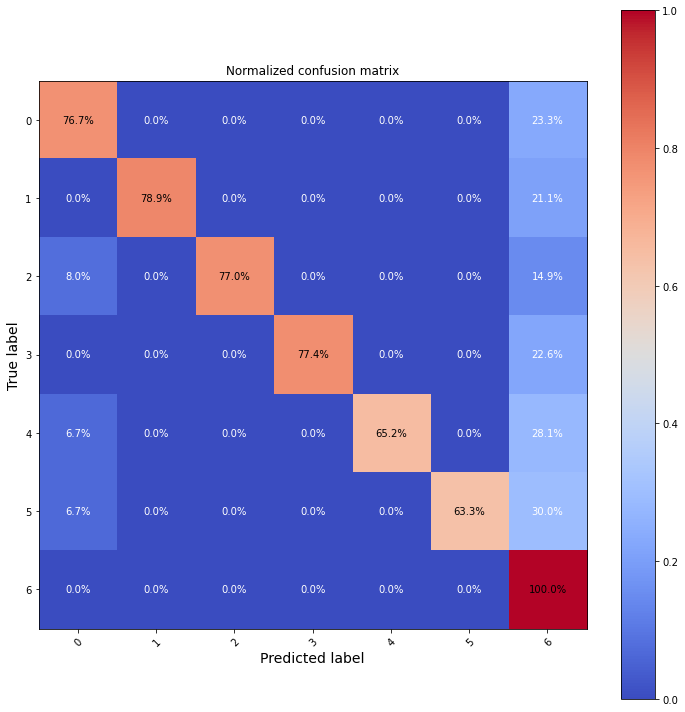

In [60]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap='coolwarm')
        
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j]*100, fmt)+'%',
                    ha="center", va="center",
                    color="black" if cm[i, j] > thresh else "white")
    fig.tight_layout()
#     plt.xlim(-0.5, len(np.unique(y))-0.5)
#     plt.ylim(len(np.unique(y))-0.5, -0.5)
    ax.set_xlabel('Predicted label', fontsize = 14)
    ax.set_ylabel('True label', fontsize = 14)
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=['0','1','2','3','4','5','6'],
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['0','1','2','3','4','5','6'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
